In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('dark_background')
plt.style.use('seaborn-white')
import seaborn as sb
import pandas as pd
import batman

In [2]:
def get_data(filename, plot, Return, date_correction):
    data = pd.read_csv(filename, sep='\t')
    Time = data['BJD_TDB'].values - date_correction
    Flux = data['rel_flux_T1'].values
    err = data['rel_flux_err_T1']
    if plot == True:
        plt.figure(figsize=(20, 10))
        plt.errorbar(Time, Flux, err, fmt='o')
        plt.ylabel('Relative Flux', fontsize=20)
        plt.xlabel('BJD_TDB - ' + str(date_correction) + ' (mid-exposure)', fontsize=20)
    if Return == True:
        return Time, Flux, err

In [3]:
def normalize_data(filename, plot, Return, date_correction, ingress, egress):
    Time = get_data(filename, False, True, date_correction)[0]
    Flux = get_data(filename, False, True, date_correction)[1]
    err = get_data(filename, False, True, date_correction)[2]
    Time_bt = (Time[:ingress])  #define time before transit
    Time_at = (Time[egress:])  #after transit
    Time_oot = np.concatenate((Time_bt, Time_at))  #total out of transit times
    Flux_bt = (Flux[:ingress])  #define flux before transit
    Flux_at = (Flux[egress:])  #after transit
    Flux_oot = np.concatenate((Flux_bt, Flux_at))  #total out of transit flux
    b = np.polyfit(Time_oot, Flux_oot,
                   0)  #find intercept (normalizing constant)
    b_array = np.full(len(Time_oot), b)
    Flux_norm = Flux / b
    err_norm = err / b
    if plot == True:
        plt.figure(figsize=(20, 10))
        plt.errorbar(Time, Flux_norm, err_norm, fmt='o')
        plt.axhline(1)
        plt.axvline(Time[ingress])
        plt.axvline(Time[egress])
        plt.ylabel('Relative Flux (Normalized)', fontsize=20)
        plt.xlabel('BJD_TDB - ' + str(date_correction) + ' (mid-exposure)', fontsize=20)
    if Return == True:
        return Flux_norm, err_norm

In [4]:
def model(filename, date_correction, ingress, egress, t0, per, rp, a, inc):

    Time = get_data(filename, False, True, date_correction)[0]
    Flux = get_data(filename, False, True, date_correction)[1]
    Flux_norm = normalize_data(filename, False, True, date_correction, ingress,
                               egress)[0]
    err_norm = normalize_data(filename, False, True, date_correction, ingress,
                              egress)[1]

    params = batman.TransitParams()  #object to store transit parameters
    params.t0 = t0  #time of inferior conjunction
    params.per = per  #orbital period
    params.rp = rp  #planet radius (in units of stellar radii)
    params.a = a  #semi-major axis (in units of stellar radii)
    params.inc = inc  #orbital inclination (in degrees)
    params.ecc = 0.  #eccentricity
    params.w = 90.  #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"  #limb darkening model
    params.u = [0.32314156, 0.26871384]  #limb darkening coefficients [u1, u2]

    #Time = np.linspace(
    #    Time[0], Time[-1], len(Time))  #times at which to calculate light curve
    #Time = Time
    m = batman.TransitModel(params, Time)  #initializes model

    model_flux = m.light_curve(params)  #calculates light curve
    radii = np.linspace(0.09, 0.11, 20)
    for r in radii:
        params.rp = r  #updates planet radius
        new_flux = m.light_curve(params)  #recalculates light curve

    plt.figure(figsize=(20, 10))
    plt.errorbar(Time, Flux_norm, err_norm, fmt='o', label="Data")  #data
    plt.plot(Time, model_flux, linewidth=5,
             label="Transit Model")  #model
    plt.ylabel('Relative Flux (Normalized)', fontsize=20)
    plt.xlabel('BJD_TDB - ' + str(date_correction) + ' (mid-exposure)',
               fontsize=20)
    plt.legend(fontsize=15)

Text(0.5, 1.0, 'WASP-135b UT 2020-04-23')

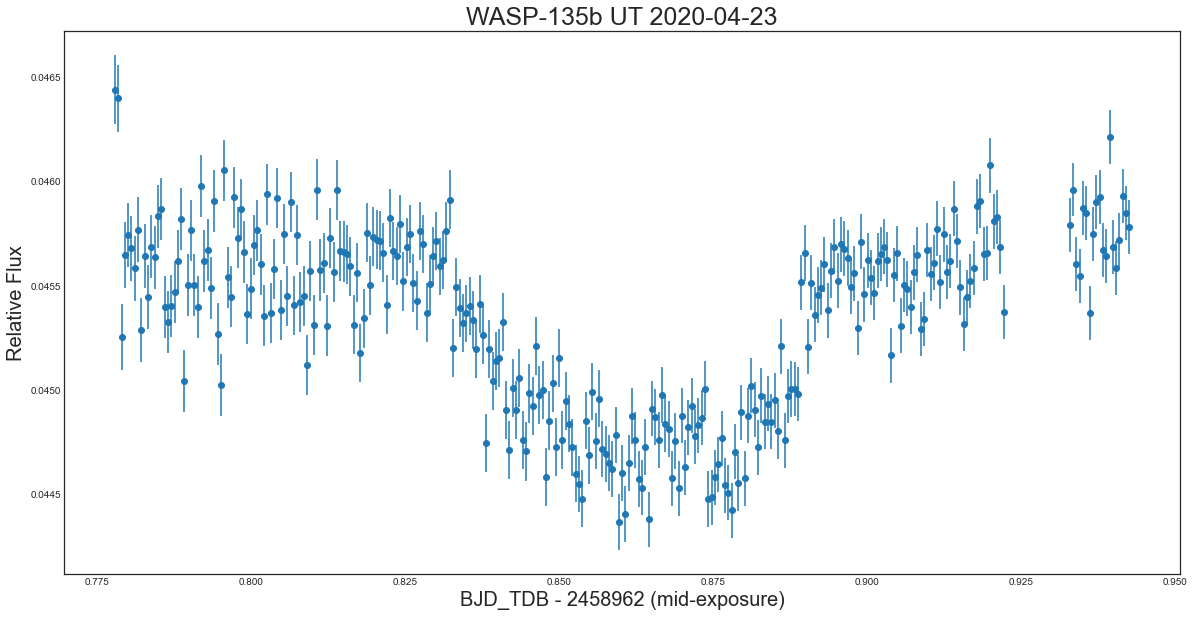

In [5]:
get_data('2020_04_23_Measurements.xls',
         plot=True,
         Return=False,
         date_correction=2458962)
plt.title("WASP-135b UT 2020-04-23", fontsize=25)

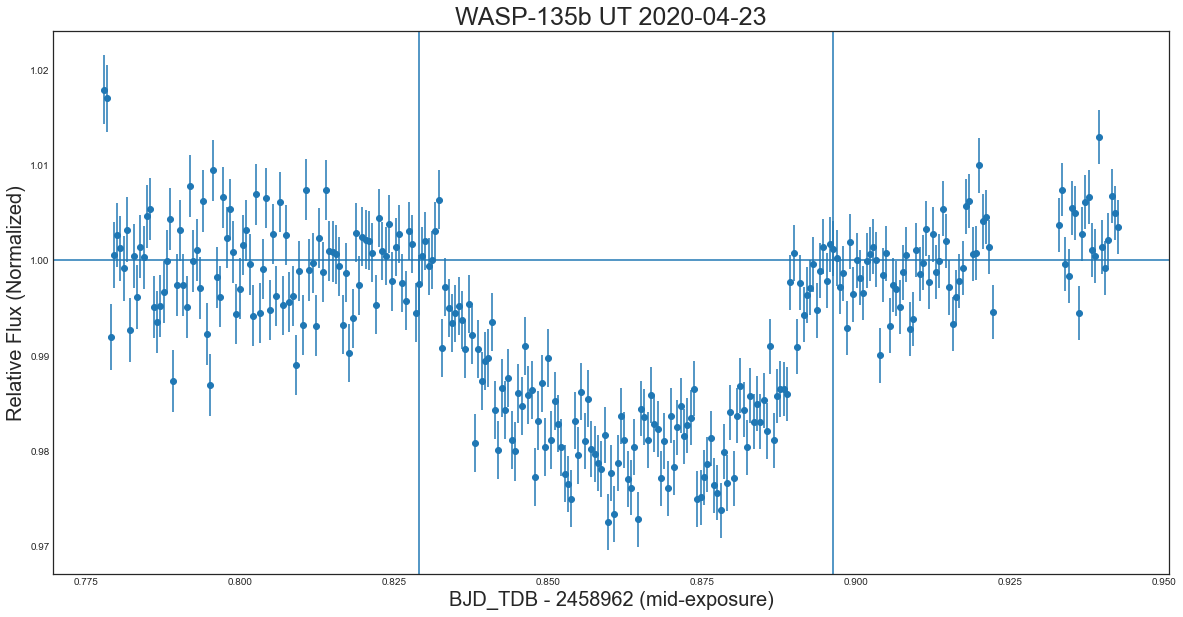

In [6]:
normalize_data('2020_04_23_Measurements.xls',
               plot=True,
               Return=False,
               date_correction=2458962,
               ingress=95,
               egress=220)
plt.title("WASP-135b UT 2020-04-23", fontsize=25)
plt.savefig("test")

Text(0.5, 1.0, 'WASP-135b UT 2020-04-23')

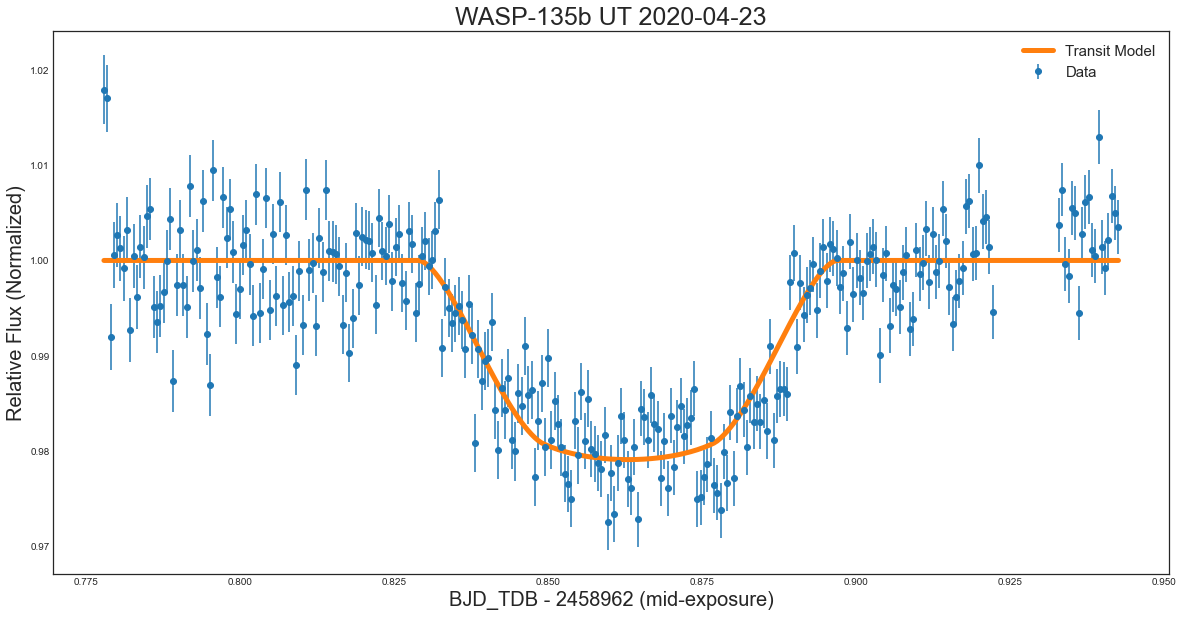

In [7]:
model('2020_04_23_Measurements.xls',
      date_correction=2458962,
      ingress=95,
      egress=220,
      t0=0.863,
      per=1.401,
      rp=0.146,
      a=5.6,
      inc=82)
plt.title("WASP-135b UT 2020-04-23", fontsize=25)

Text(0.5, 1.0, 'WASP-135b UT 2020-05-07')

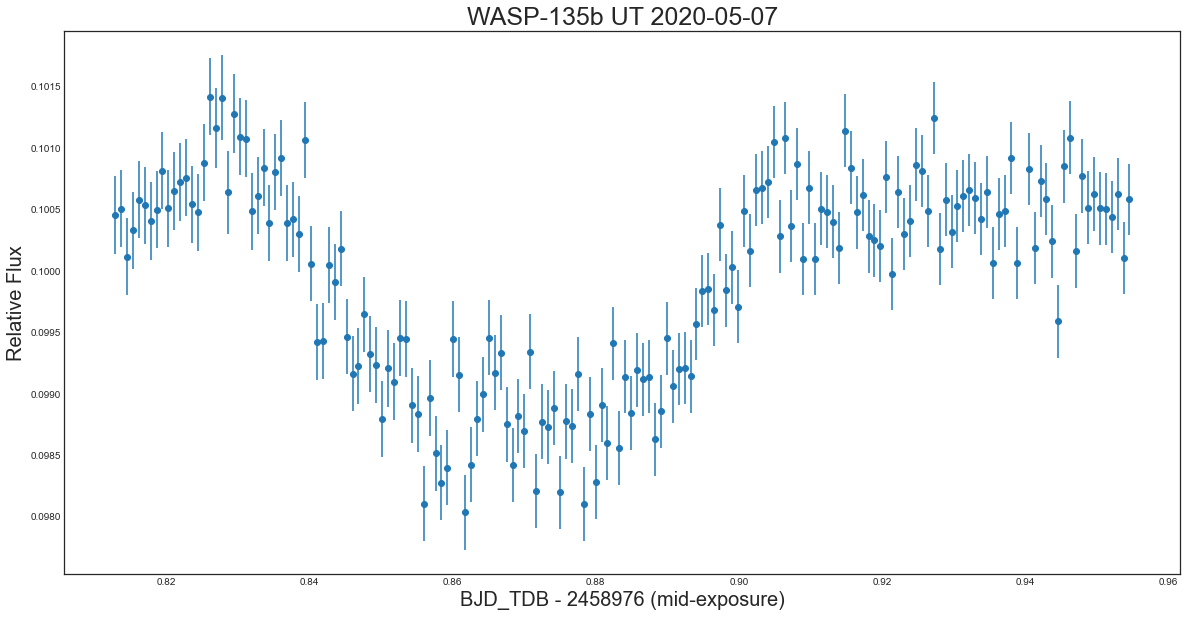

In [8]:
get_data('2020_05_07_Measurements.xls',
         date_correction=2458976,
         plot=True,
         Return=False)
plt.title("WASP-135b UT 2020-05-07", fontsize=25)

Text(0.5, 1.0, 'WASP-135b UT 2020-05-07')

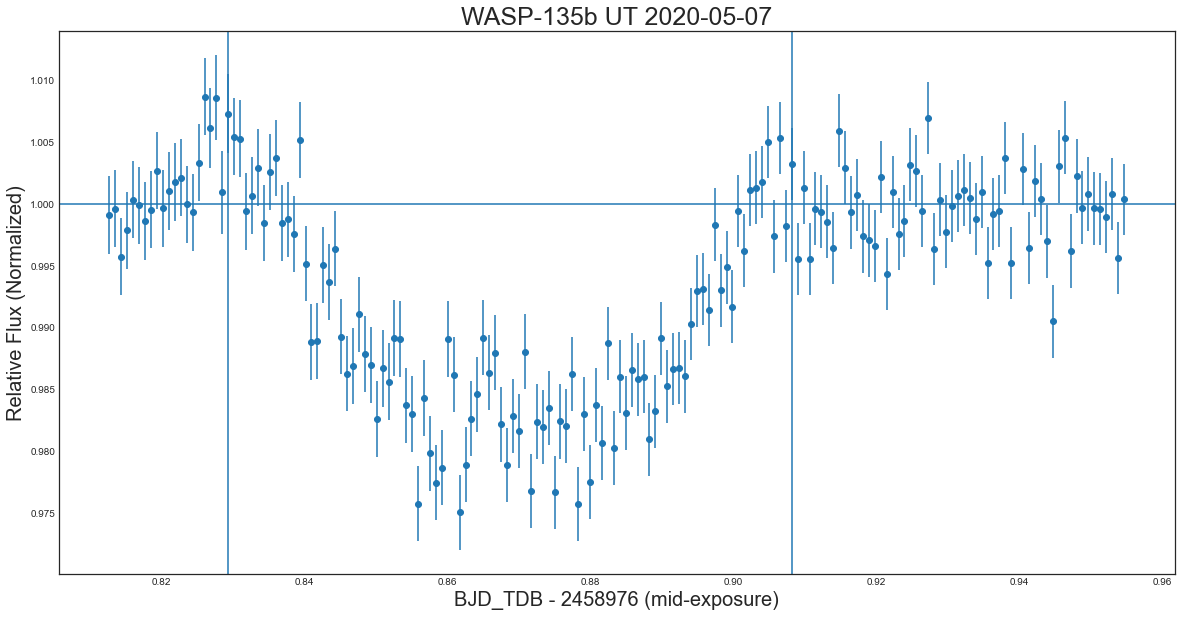

In [9]:
normalize_data('2020_05_07_Measurements.xls',
               date_correction=2458976,
               plot=True,
               Return=False,
               ingress=20,
               egress=115)
plt.title("WASP-135b UT 2020-05-07", fontsize=25)

Text(0.5, 1.0, 'WASP-135b UT 2020-05-07')

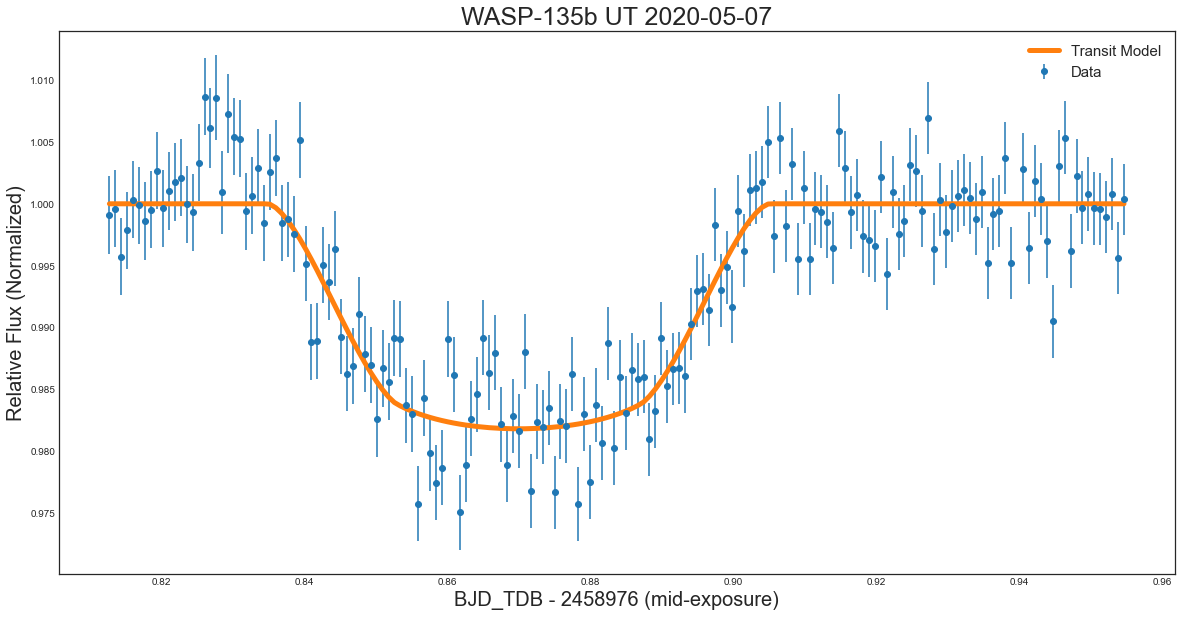

In [10]:
model('2020_05_07_Measurements.xls',
      date_correction=2458976,
      ingress=20,
      egress=115,
      t0=0.87,
      per=1.401,
      rp=0.135,
      a=5.45,
      inc=82)
plt.title("WASP-135b UT 2020-05-07", fontsize=25)

Text(0.5, 1.0, 'WASP-135b UT 2020-05-27')

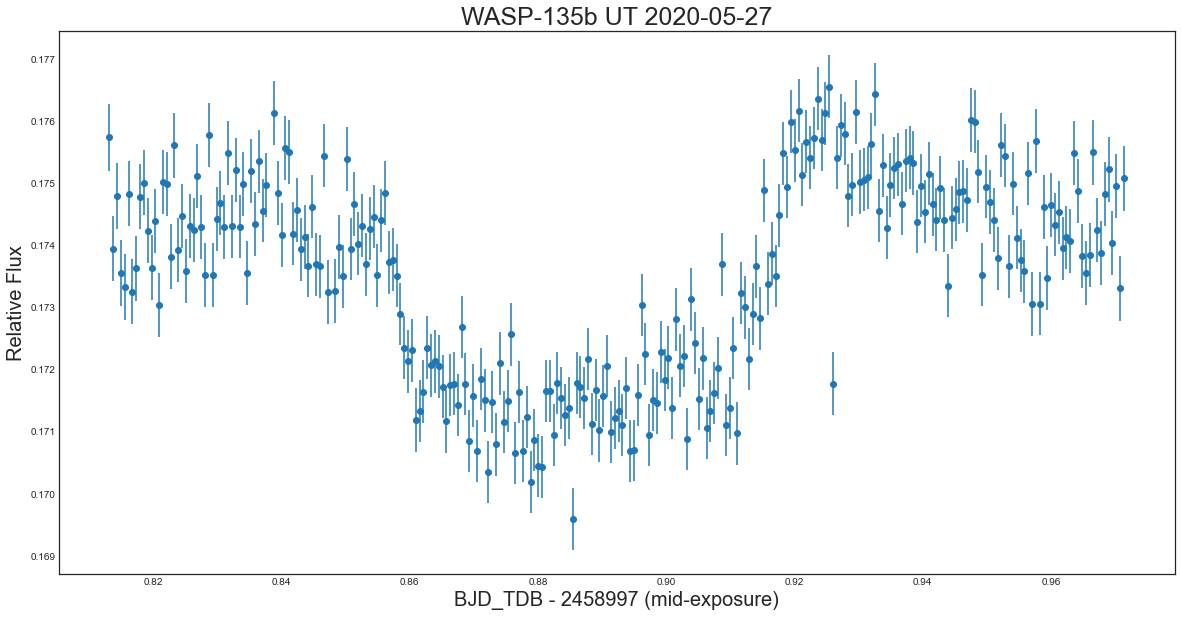

In [11]:
get_data('2020_05_27_Measurements.xls',
         date_correction=2458997,
         plot=True,
         Return=False)
plt.title("WASP-135b UT 2020-05-27", fontsize=25)

Text(0.5, 1.0, 'WASP-135b UT 2020-05-27')

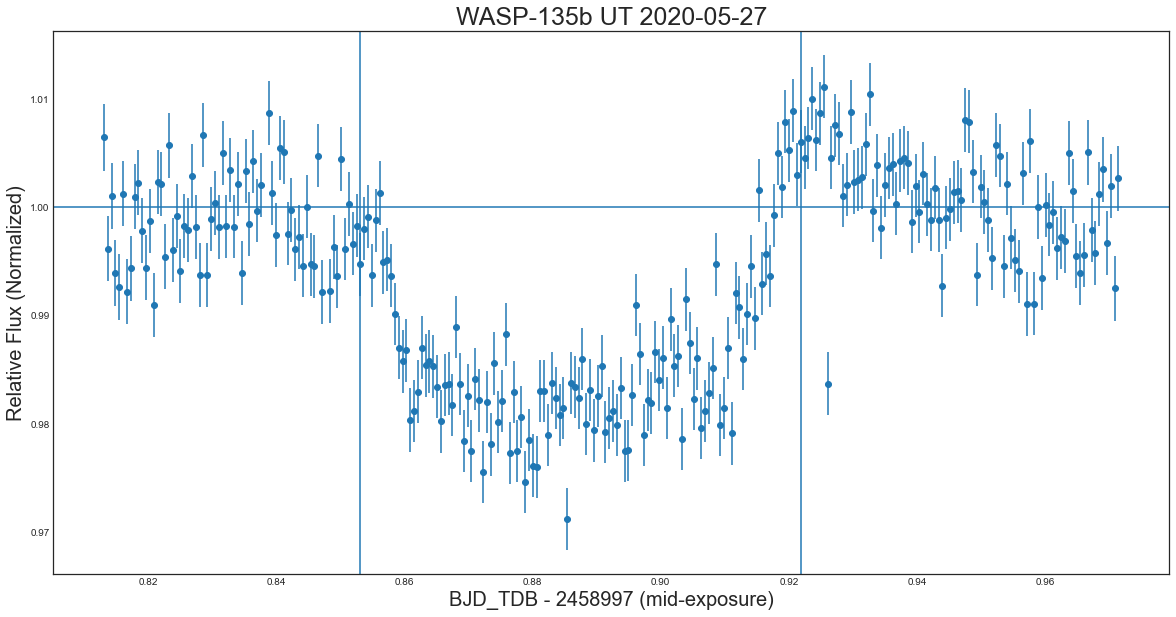

In [12]:
normalize_data('2020_05_27_Measurements.xls',
               date_correction=2458997,
               plot=True,
               Return=False,
               ingress=65,
               egress=180)
plt.title("WASP-135b UT 2020-05-27", fontsize=25)

Text(0.5, 1.0, 'WASP-135b UT 2020-05-27')

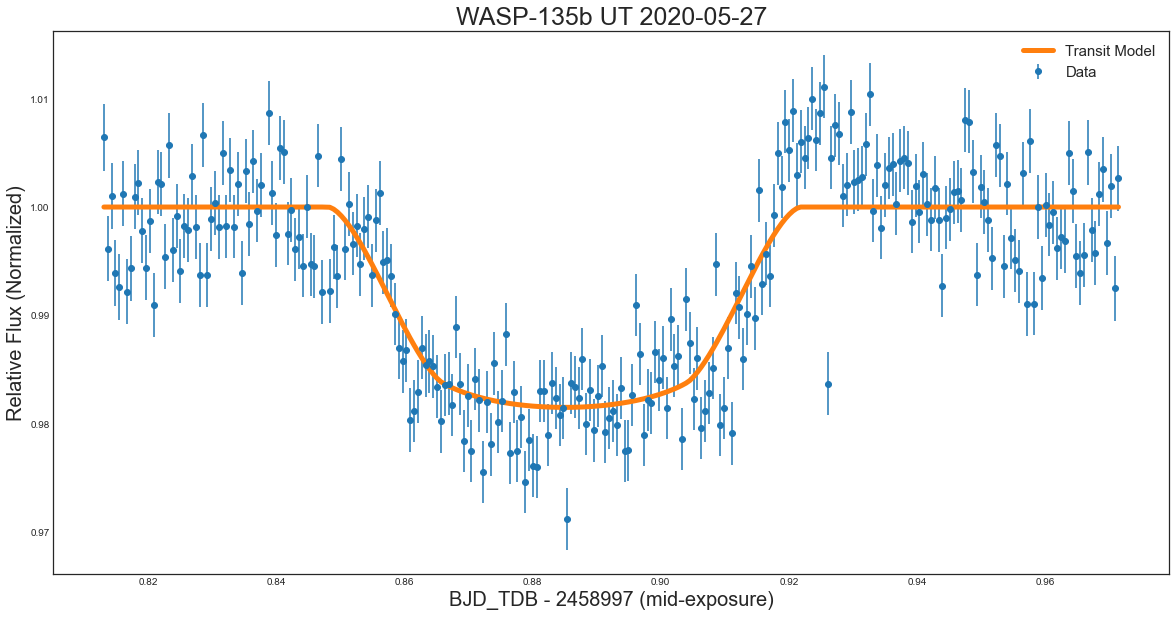

In [13]:
model('2020_05_27_Measurements.xls',
      date_correction=2458997,
      ingress=65,
      egress=180,
      t0=0.885,
      per=1.401,
      rp=0.135,
      a=5.3,
      inc=82)
plt.title("WASP-135b UT 2020-05-27", fontsize=25)

Text(0.5, 1.0, 'WASP-135b UT 2021-06-02')

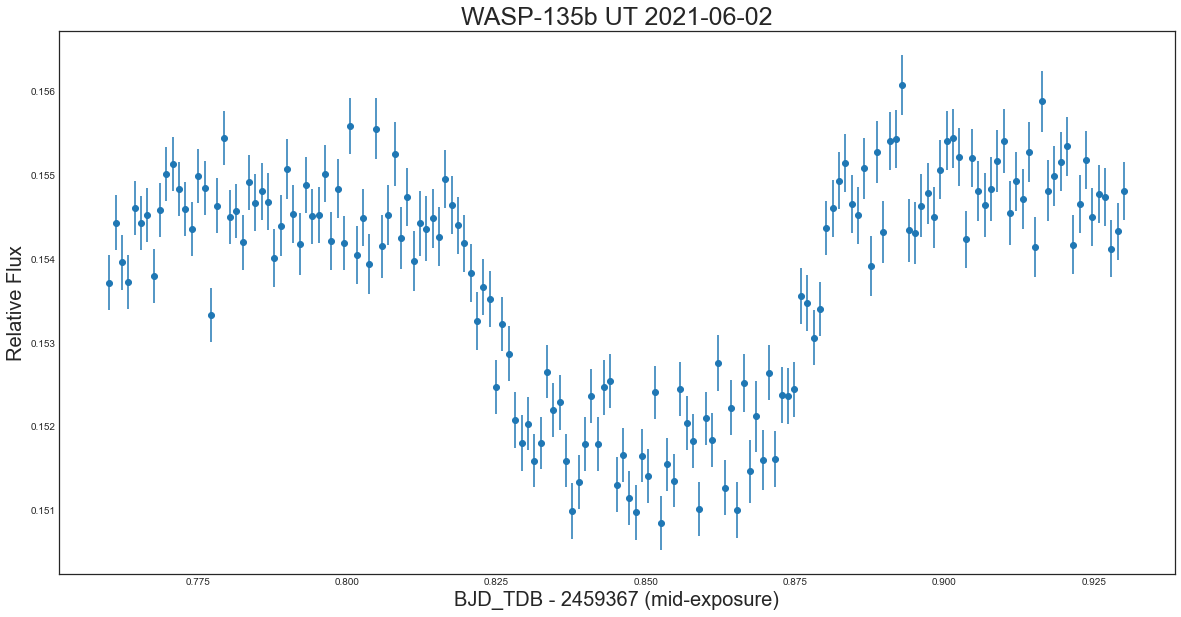

In [14]:
get_data('2021_06_02_Measurements.xls',
         plot=True,
         Return=False,
         date_correction=2459367)
plt.title("WASP-135b UT 2021-06-02", fontsize=25)

Text(0.5, 1.0, 'WASP-135b UT 2021-06-02')

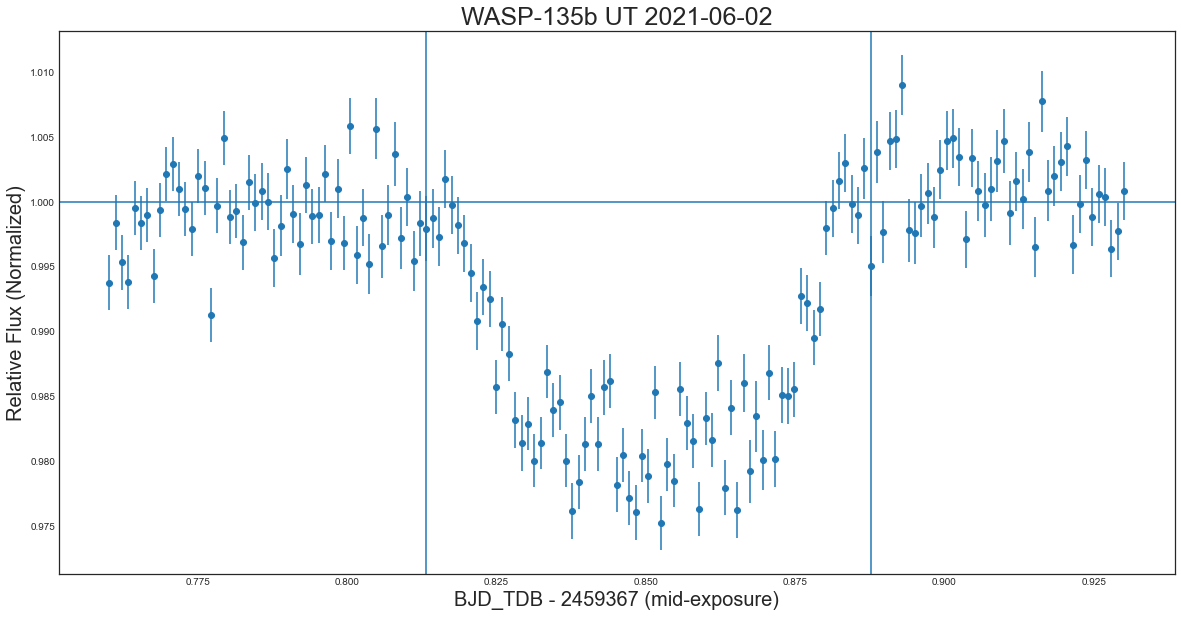

In [15]:
normalize_data('2021_06_02_Measurements.xls',
               date_correction=2459367,
               plot=True,
               Return=False,
               ingress=50,
               egress=120)
plt.title("WASP-135b UT 2021-06-02", fontsize=25)

Text(0.5, 1.0, 'WASP-135b UT 2021-06-02')

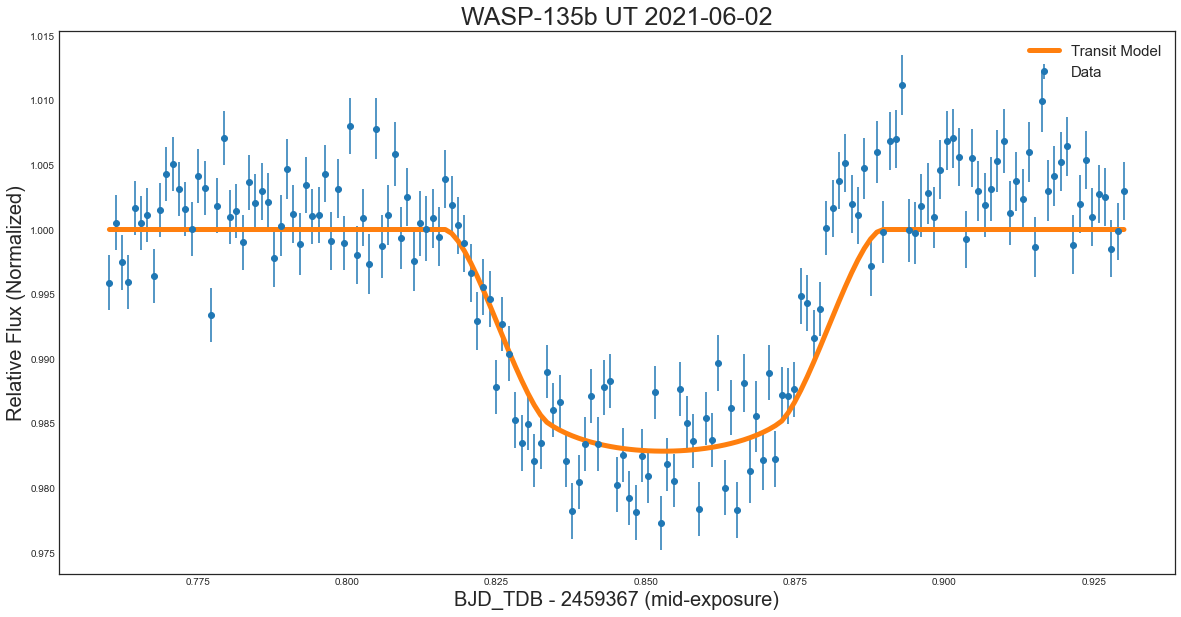

In [16]:
model('2021_06_02_Measurements.xls',
      date_correction=2459367,
      ingress=65,
      egress=180,
      t0=0.853,
      per=1.401,
      rp=0.13,
      a=5.3,
      inc=82)
plt.title("WASP-135b UT 2021-06-02", fontsize=25)

Text(0.5, 1.0, 'WASP-135b UT 2022-05-19')

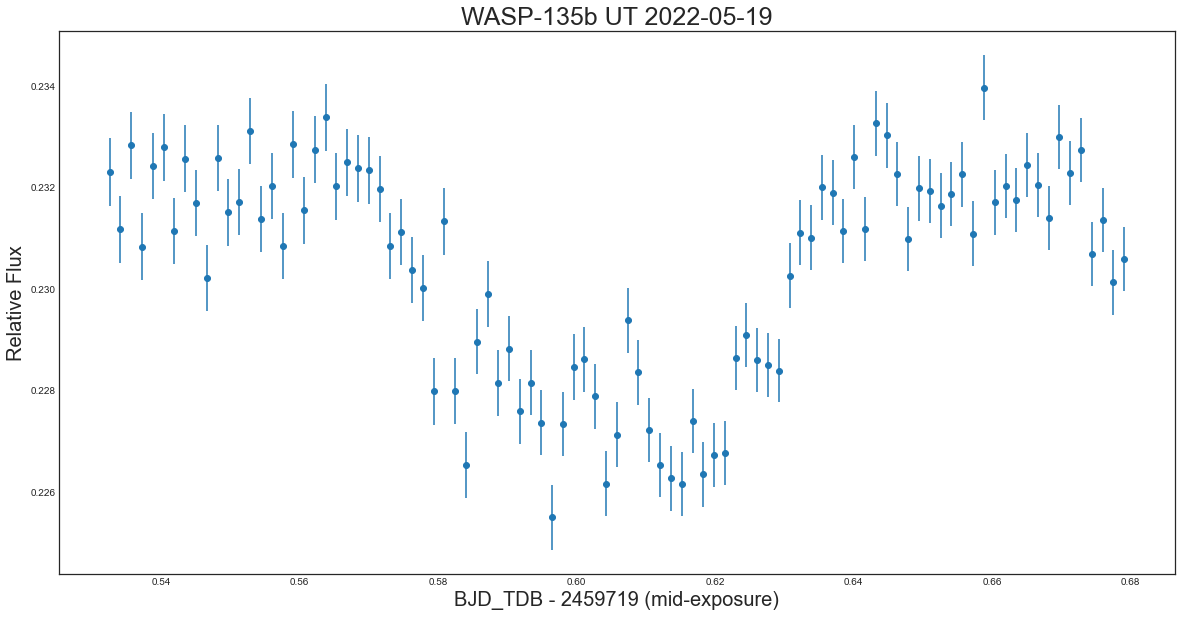

In [17]:
get_data('2022_05_19_Measurements.xls',
         plot=True,
         Return=False,
         date_correction=2459719)
plt.title("WASP-135b UT 2022-05-19", fontsize=25)

Text(0.5, 1.0, 'WASP-135b UT 2022-05-19')

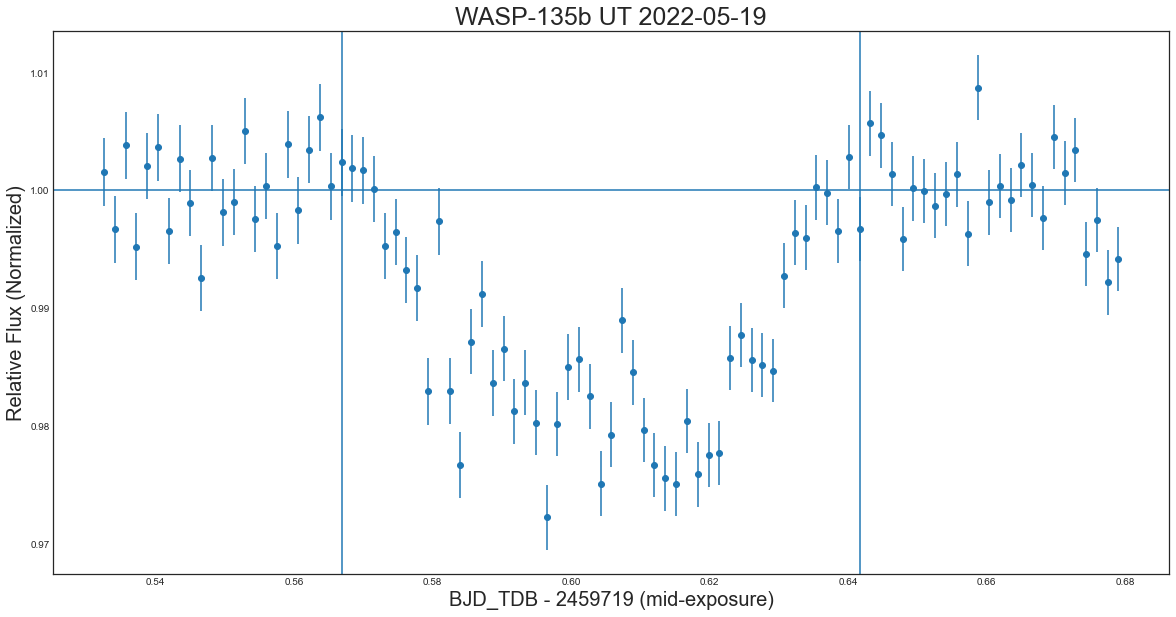

In [18]:
normalize_data('2022_05_19_Measurements.xls',
               date_correction=2459719,
               plot=True,
               Return=False,
               ingress=22,
               egress=70)
plt.title("WASP-135b UT 2022-05-19", fontsize=25)

Text(0.5, 1.0, 'WASP-135b UT 2022-05-19')

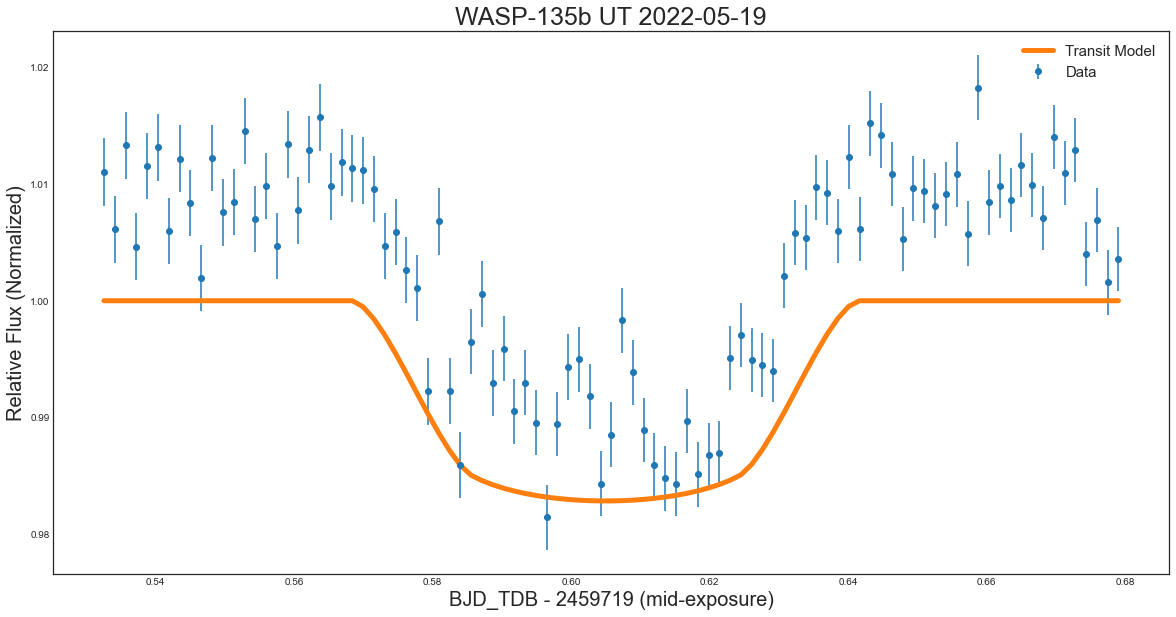

In [19]:
model('2022_05_19_Measurements.xls',
      date_correction=2459719,
      ingress=65,
      egress=180,
      t0=0.605,
      per=1.401,
      rp=0.13,
      a=5.3,
      inc=82)
plt.title("WASP-135b UT 2022-05-19", fontsize=25)